<a href="https://colab.research.google.com/github/mujdeakti/MakineOgrenmesi-DerinOgrenme/blob/main/MOYegitim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Drive Baglantisinin kurulmasi
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#model eğitim için ayırdığımız veriseti bölümlendirmesini yapılandırıyoruz
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Colab Notebooks/hazir_veriseti_4_sinif(train-val-test)/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Colab Notebooks/hazir_veriseti_4_sinif(train-val-test)/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_data = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Colab Notebooks/hazir_veriseti_4_sinif(train-val-test)/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Önemli! test sonuçlarını sınıf sırasına göre görürsün
)


Found 5047 images belonging to 4 classes.
Found 1080 images belonging to 4 classes.
Found 1086 images belonging to 4 classes.


In [ ]:
#model mimarimizi oluşturuyoruz. (bu kısım modelimizi ifade ediyor. sadece bu kısmı değiştirerek yeni modeller üretebiliriz.)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose  # İsteğe bağlı: upsampling yerine
from tensorflow.keras.layers import Input
from tensorflow.keras import layers

model = Sequential([
    Conv2D(32, (3, 3), dilation_rate=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), dilation_rate=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), dilation_rate=4, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),  # Flatten yerine daha az parametre, daha soyut öğrenme
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 sınıf için çıktı
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#modeli derleyip çalıştırıyoruz (yani eğitime başlıyoruz)
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    epochs=20,  # yüksek verebilirsin çünkü erken duracak
    validation_data=val_data,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 1343s 8s/step - accuracy: 0.5593 - loss: 1.0678 - val_accuracy: 0.2333 - val_loss: 2.0399
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 193ms/step - accuracy: 0.7181 - loss: 0.7211 - val_accuracy: 0.3194 - val_loss: 1.3626
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.7354 - loss: 0.6488 - val_accuracy: 0.3685 - val_loss: 1.3536
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.7540 - loss: 0.6042 - val_accuracy: 0.7120 - val_loss: 0.7025
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - accuracy: 0.7876 - loss: 0.5421 - val_accuracy: 0.6213 - val_loss: 1.0918
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - accuracy: 0.7989 - loss: 0.5134 - val_accuracy: 0.8306 - val_loss: 0.4438
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 197ms/step - accuracy: 0.7979 - loss: 0.4846 - val_accuracy: 0.8130 - val_loss: 0.4361
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.7925 - loss: 0.

In [ ]:
# Test verisi üzerinde modeli değerlendir
test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Doğruluğu: {test_acc:.4f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 317s 10s/step - accuracy: 0.8962 - loss: 0.2811

Test Doğruluğu: 0.8352


In [ ]:
#modeli daha ayrıntılı test ediyoruz
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# predictions = model.predict(test_data)
# predicted_classes = (predictions > 0.5).astype(int).flatten()  ❌ Yalnızca binary içindir

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)  # ✅ Softmax çıktısından en yüksek olasılığı seç

# Gerçek etiketler ve sınıf adları aynı kalabilir
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# Rapor
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print("Karışıklık Matrisi:")
print(confusion_matrix(true_classes, predicted_classes))

34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step
                      precision    recall  f1-score   support

       0_(5-17)_genc       0.94      0.98      0.96       350
1_(18-37)_yetiskin_1       0.75      0.81      0.78       253
2_(38-64)_yetiskin_2       0.83      0.52      0.64       254
    3_(65-100)_yasli       0.78      0.99      0.87       229

            accuracy                           0.84      1086
           macro avg       0.83      0.82      0.81      1086
        weighted avg       0.84      0.84      0.83      1086

Karışıklık Matrisi:
[[344   1   4   1]
 [  6 205  21  21]
 [ 16  66 132  40]
 [  0   1   2 226]]


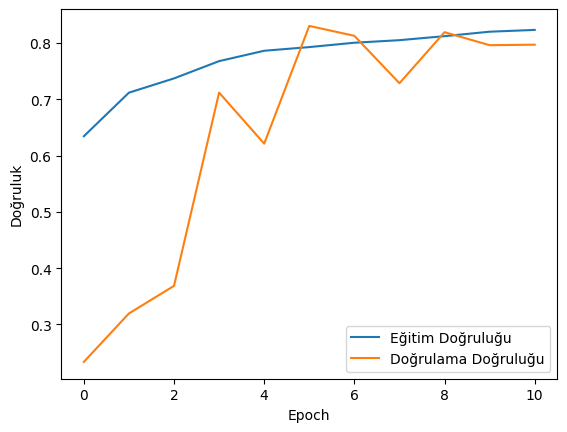

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/Colab Notebooks/mimari3_4lu.keras')